In [4]:
#import dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#read in data frame from database 
data_df = pd.read_csv("Resources/Clean_Data.csv")

In [6]:
data_df

,Unnamed: 0,Week,HHS_Region,Race,COVID_Deaths
0,4896,2020-01-04,1,Hispanic,0.0
1,4897,2020-01-04,1,Hispanic,0.0
2,4898,2020-01-04,1,Hispanic,0.0
3,4899,2020-01-04,1,Hispanic,0.0
4,4900,2020-01-04,1,Hispanic,0.0
...,...,...,...,...,...
42835,53842,2021-04-17,10,Non-Hispanic White,0.0
42836,53843,2021-04-17,10,Non-Hispanic White,NaN
42837,53844,2021-04-17,10,Non-Hispanic White,NaN
42838,53845,2021-04-17,10,Non-Hispanic White,NaN


In [7]:
#get the total deaths in week
weekly_deaths = data_df.groupby(["Week"]).sum()["COVID_Deaths"]
weekly_deaths

Week
2020-01-04       0.0
2020-01-11       0.0
2020-01-18       0.0
2020-01-25       0.0
2020-02-01       0.0
               ...  
2021-03-20    3807.0
2021-03-27    3151.0
2021-04-03    2394.0
2021-04-10    1922.0
2021-04-17     761.0
Name: COVID_Deaths, Length: 68, dtype: float64

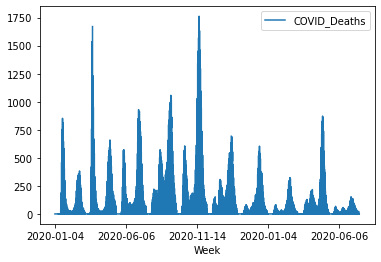

In [9]:
data_df.plot.line(x="Week", y="COVID_Deaths")

plt.show()

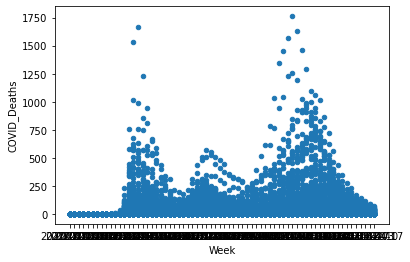

In [10]:
data_df.plot.scatter(x="Week", y="COVID_Deaths")
plt.show()